**Mount the Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**-Import Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


**Load the dataset and showcase the first 5 rows**

In [4]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Spam-Email.csv')
#display the first 5 rows of the dataset
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


**Display the number of rows and columns**

In [5]:
#get the number of rows and columns
df.shape

(83448, 2)

In [6]:
#get the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
labels = {0 : "Not Spam", 1 : "Spam"}
#calculates the counts of unique values in the 'label' column of the DataFrame
label_counts = df['label'].value_counts()
#display the 'not spam ' and 'spam' labels
print(label_counts)

1    43910
0    39538
Name: label, dtype: int64


In [8]:
#group the DataFrame by the unique values in the 'label' column
df.groupby(df['label']).describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      39538  39538   computer connection from cnn com wednesday es...    1
1      43910  43910  ounce feather bowl hummingbird opec moment ala...    1

**DATA PREPROCESSING**

In [9]:
# Checking for null values
df.isna().sum()
#from the output in the dataset we have no null values in both the text and label column

label    0
text     0
dtype: int64

**Handling** duplicates

In [10]:
# Print the number of duplicate rows in the DataFrame
print(f"Number of duplicates: {np.sum(df.duplicated())}")
# Remove duplicate rows from the DataFrame in-place
df.drop_duplicates(inplace = True)
# Print the number of duplicates after dropping duplicates
print(f"Number of duplicates after dropping duplicates : {np.sum(df.duplicated())}")
#from the output there are no duplicates din the dataset

Number of duplicates: 0
Number of duplicates after dropping duplicates : 0


In [11]:
#get the new shape of the dataset after dropping duplicates
print(df.shape)

(83448, 2)


In [12]:
# Extract feature matrix X and target variable y from the DataFrame
X = df.drop('label', axis = 1).values
y = df['label'].values
# Print the shapes of the feature matrix X and target variable y
print(X.shape, y.shape)

(83448, 1) (83448,)


In [13]:
#display data in X
print(X)

[['ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage']
 ["wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber what's worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http dmvrwm remunerativ net dfuaeirxygiq visit our website escapenumber"]
 [" computer connection from cnn

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Extract the text feature from the training and test sets
# Selects the first column of the feature matrix for training data
text_train = X_train[:, 0]
# Selects the first column of the feature matrix for testing data
text_test = X_test[:, 0]


Convert the training set into TF-IDF features

In [16]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Transform the training text data into TF-IDF feature matrix
X_train_tfidf = vectorizer.fit_transform(text_train)
# Transform the test text data into TF-IDF feature matrix using the same vectorizer
X_test_tfidf = vectorizer.transform(text_test)

CREATE AND TRAIN MACHINE LEARNING MODEL

In [17]:
# Create XGBoost classifier
xgb_model = xgb.XGBClassifier()

In [18]:
# Train the model on the training set
xgb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
# Make predictions on the test set
y_pred = xgb_model.predict(vectorizer.transform(text_test))

Evaluate the model

In [20]:
# Calculate accuracy by comparing predicted labels (y_pred) with true labels (y_test)
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy on the test set
print(f'Accuracy on Test Set: {accuracy}')

Accuracy on Test Set: 0.9823247453565009


In [21]:
#get the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)

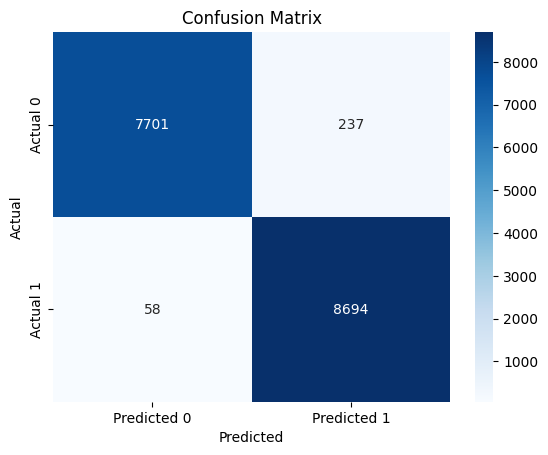

In [22]:
# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#calculate the recall
recall = recall_score(y_test, y_pred)
#display the recall results
print(f'Recall: {recall:.2f}')

Recall: 0.99


HYPERPARAMETER TUNING

Define a parameter grid for hyperparameter tuning

In [24]:
param_dist = {
    # Number of boosting rounds or decision trees
    'n_estimators': [50, 100, 200],
    # Maximum depth of each tree in the ensemble
    'max_depth': [3, 5, 7],
    # Step size at each iteration for moving towards minimum loss
    'learning_rate': np.linspace(0.01, 0.2, 10),
}

In [25]:
#randomized search with 5-fold cross-validation and parallel processing
randomized_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1)
# Fit the RandomizedSearchCV to the training data for hyperparameter tuning
randomized_search.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [26]:
# Get the best parameters from the randomized search
best_params = randomized_search.best_params_

In [27]:
# Use the best parameters to create the final model
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
# Make predictions on the test set
y_pred = final_model.predict(vectorizer.transform(text_test))

MODEL EVALUATION

In [29]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
#print the best parameters
print(f'Best Parameters: {best_params}')
#print the accuracy test on after hyperparameter tuning
print(f'Accuracy on Test Set: {accuracy}')

Best Parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2}
Accuracy on Test Set: 0.9816057519472738


In [37]:
#get the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
recall = recall_score(y_test, y_pred)
print("recall:",recall)
f1 = f1_score(y_test, y_pred)
print("F1_score:",f1)

recall: 0.9946297989031079
print: 0.9826720099339618


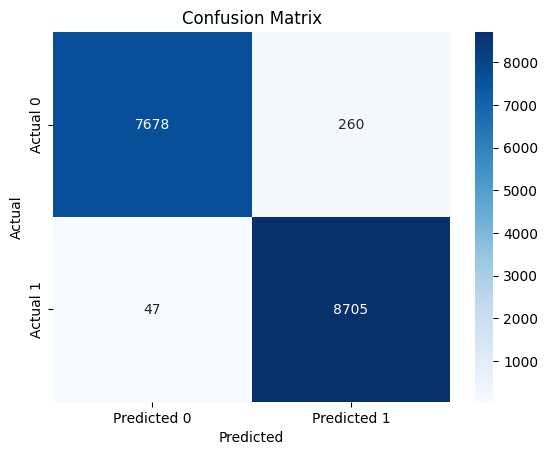

In [31]:
# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

MODEL SAVING

In [32]:
import pickle
model_and_vectorizer = {'model': final_model, 'vectorizer': vectorizer}

# Open the file in binary write mode and dump the data
with open('model.pkl', 'wb') as file:
    pickle.dump(model_and_vectorizer, file)


download the model

In [33]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>